## LIBRARY IMPORTING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA IMPORTING

In [2]:
netflix_df = pd.read_csv(r"C:\Users\CHANDU\Desktop\VOIS_Works\Major_Project\Netflix Dataset.csv")

In [3]:
netflix_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


## DATA PREPARATION AND CLEANING

In [5]:
# Finding the number of missing values
netflix_df.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [6]:
#Dropping all the missing values
netflix_df.dropna(inplace=True,ignore_index=True)
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       4811 non-null   object
 1   Category      4811 non-null   object
 2   Title         4811 non-null   object
 3   Director      4811 non-null   object
 4   Cast          4811 non-null   object
 5   Country       4811 non-null   object
 6   Release_Date  4811 non-null   object
 7   Rating        4811 non-null   object
 8   Duration      4811 non-null   object
 9   Type          4811 non-null   object
 10  Description   4811 non-null   object
dtypes: object(11)
memory usage: 413.6+ KB


In [7]:
#Changing the datatypes
netflix_df["Release_Date"] = pd.to_datetime(netflix_df["Release_Date"],format="mixed")
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       4811 non-null   object        
 1   Category      4811 non-null   object        
 2   Title         4811 non-null   object        
 3   Director      4811 non-null   object        
 4   Cast          4811 non-null   object        
 5   Country       4811 non-null   object        
 6   Release_Date  4811 non-null   datetime64[ns]
 7   Rating        4811 non-null   object        
 8   Duration      4811 non-null   object        
 9   Type          4811 non-null   object        
 10  Description   4811 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 413.6+ KB


In [8]:
netflix_df["Category"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [9]:
netflix_df["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [10]:
#Splitting the country column values with multiple countries to single country in each row
netflix_df["Country"] = netflix_df["Country"].apply(lambda x: x.split(","))

In [11]:
#df.explode is used to allocate each country in single row
netflix_df=netflix_df.explode("Country",ignore_index=True)

In [12]:
#Set the values properly with no spaces and proper indentation
netflix_df["Country"]=netflix_df["Country"].apply(lambda x: x.strip())

In [13]:
#Identify duplicates and remove them
netflix_df.duplicated().sum()

np.int64(2)

In [14]:
netflix_df.drop_duplicates(ignore_index=True, inplace=True)

In [15]:
#Check for NULLS
netflix_df.isna().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [16]:
netflix_df=netflix_df.drop(netflix_df[netflix_df["Country"] == ""].index)

## DATA ANALYSIS

In [28]:
#Category wise Number of Movies or Series
Category_wise_count=netflix_df.pivot_table(index="Category",values="Show_Id",aggfunc="nunique")
Category_wise_count.rename(columns={"Show_Id":"Count"},inplace=True)
Category_wise_count

,Count
Category,
Movie,4673
TV Show,136


In [29]:
#Movies or Series based on Rating
Movies_Rating = netflix_df.pivot_table(index="Rating",values="Show_Id",aggfunc="nunique")
Movies_Rating.rename(columns={"Show_Id":"Count"},inplace=True)
Movies_Rating

,Count
Rating,
G,38
NC-17,2
NR,62
PG,238
PG-13,375
R,654
TV-14,1133
TV-G,80
TV-MA,1666


In [30]:
#Country wise the count of movies or series
Country_Count = netflix_df.pivot_table(index="Country",values="Show_Id",aggfunc="nunique")
Country_Count.rename(columns={"Show_Id":"Count"},inplace=True)
Country_Count_Top_10=Country_Count.sort_values("Count",ascending=False).head(10)
Country_Count_Top_10

,Count
Country,
United States,2182
India,891
United Kingdom,426
Canada,263
France,254
Spain,147
Germany,143
Japan,108
China,98


In [31]:
#Type of show and their count over years
count_yr = netflix_df.pivot_table(index=[netflix_df["Release_Date"].dt.year,"Category"],values="Show_Id",aggfunc="nunique")
count_yr.rename(columns={"Show_Id":"Count"},inplace=True)
count_yr

Count
Release_Date Category       
2008         Movie         1
2009         Movie         2
2010         Movie         1
2011         Movie        13
2012         Movie         3
2013         Movie         6
             TV Show       1
2014         Movie        14
2015         Movie        47
             TV Show       3
2016         Movie       200
             TV Show       7
2017         Movie       727
             TV Show      25
2018         Movie      1098
             TV Show      17
2019         Movie      1309
             TV Show      28
2020         Movie      1177
             TV Show      52
2021         Movie        75
             TV Show       3

In [32]:
#Type wise and based on release year the count of movies
Type_Yr_Count = netflix_df.pivot_table(columns="Type",index=netflix_df["Release_Date"].dt.year,values="Show_Id",aggfunc="count")
Type_Yr_Count=Type_Yr_Count.replace(np.nan,0.0)
Type_Yr_Count

Type,Action & Adventure,"Action & Adventure, Anime Features, Children & Family Movies","Action & Adventure, Anime Features, Classic Movies","Action & Adventure, Anime Features, Horror Movies","Action & Adventure, Anime Features, International Movies","Action & Adventure, Anime Features, Sci-Fi & Fantasy","Action & Adventure, Children & Family Movies","Action & Adventure, Children & Family Movies, Classic Movies","Action & Adventure, Children & Family Movies, Comedies","Action & Adventure, Children & Family Movies, Dramas",...,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,"Stand-Up Comedy & Talk Shows, TV Comedies","TV Action & Adventure, TV Sci-Fi & Fantasy",TV Comedies,"TV Comedies, TV Dramas","TV Dramas, TV Thrillers","TV Horror, TV Mysteries, TV Thrillers",TV Shows,Thrillers
Release_Date,,,,,,,,,,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2016,2.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,...,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
#Top 5 Type of movies with frequency count
Type_wise_Count = netflix_df.pivot_table(index="Type",values="Show_Id",aggfunc="nunique")
Type_wise_Count.rename(columns={"Show_Id":"Count"},inplace=True)
Top_5_Type_wise_Count = Type_wise_Count.sort_values(by="Count",ascending=False).head(5)
Top_5_Type_wise_Count

,Count
Type,
"Dramas, International Movies",306
Stand-Up Comedy,276
"Comedies, Dramas, International Movies",237
"Dramas, Independent Movies, International Movies",213
"Children & Family Movies, Comedies",158


## DATA VISUALISATION

Text(0.5, 1.0, 'Movie Category Wise Freq Count')

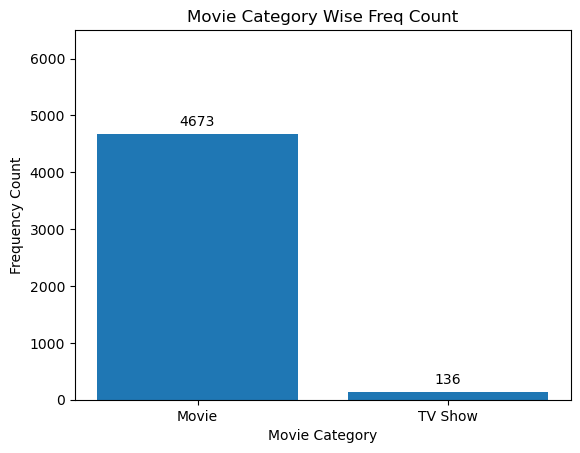

In [23]:
# Bar graph for the count of movies based on Category
category_freq_bar = plt.bar(Category_wise_count.index,Category_wise_count.loc[:,"Count"])
plt.bar_label(category_freq_bar,Category_wise_count.loc[:,"Count"],padding=4)
plt.ylim(0,6500)
plt.xlabel("Movie Category")
plt.ylabel("Frequency Count")
plt.title("Movie Category Wise Freq Count")

Text(0.5, 1.0, 'Movie Rating Wise Freq Count')

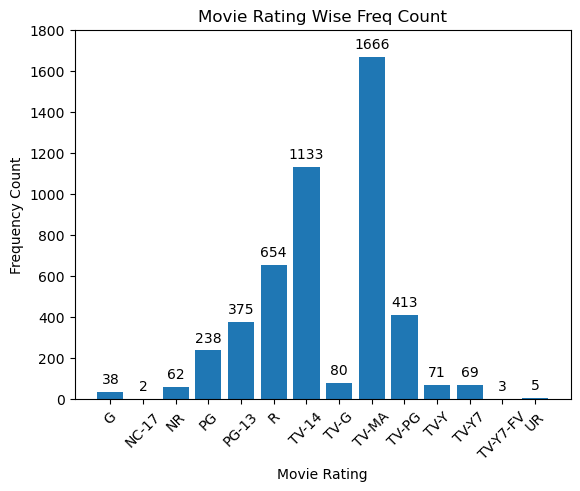

In [24]:
# Bar Graph for Movie wise Rating
movie_rating_bar = plt.bar(Movies_Rating.index,Movies_Rating.loc[:,"Count"])
plt.bar_label(movie_rating_bar,Movies_Rating.loc[:,"Count"],padding=4)
plt.xticks(rotation=45)
plt.ylim(0,1800)
plt.xlabel("Movie Rating")
plt.ylabel("Frequency Count")
plt.title("Movie Rating Wise Freq Count")

Text(0.5, 1.0, 'Top 10 Countries Based on Freq Count')

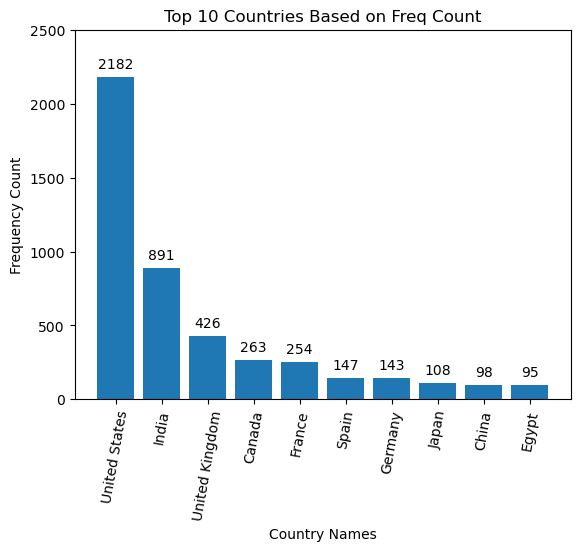

In [25]:
#Bar graph for Country Wise Movies Release Frequency of Top 10 Countries
Top_10_Country = plt.bar(Country_Count_Top_10.index,Country_Count_Top_10.loc[:,"Count"])
plt.bar_label(Top_10_Country,Country_Count_Top_10.loc[:,"Count"],padding=4)
plt.ylim(0,2500)
plt.xticks(rotation=80)
plt.xlabel("Country Names")
plt.ylabel("Frequency Count")
plt.title("Top 10 Countries Based on Freq Count")

Text(0.5, 1.0, 'Top 5 Movie Genre Based on Freq Count')

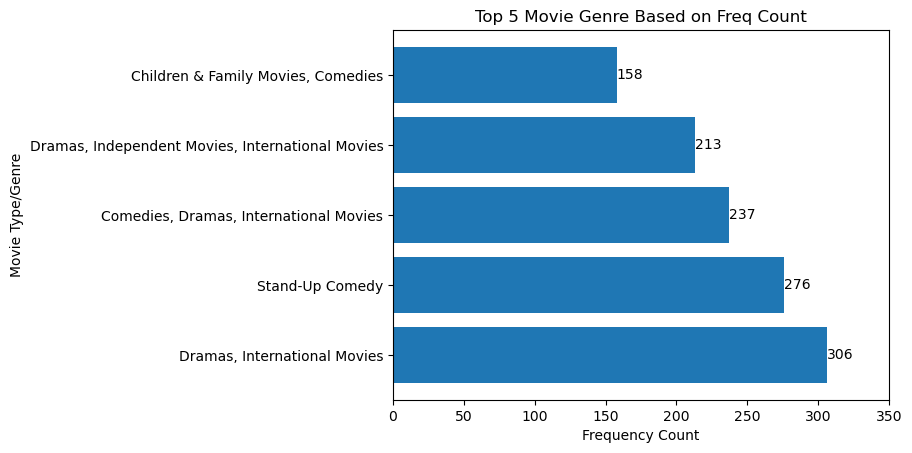

In [26]:
#Bar graph of Top 5 Genre/Type wise frequency count
Top_5_Types = plt.barh(Top_5_Type_wise_Count.index,Top_5_Type_wise_Count.loc[:,"Count"])
plt.bar_label(Top_5_Types,Top_5_Type_wise_Count.loc[:,"Count"])
plt.xlim(0,350)
plt.xlabel("Frequency Count")
plt.ylabel("Movie Type/Genre")
plt.title("Top 5 Movie Genre Based on Freq Count")

Text(0.5, 1.0, 'Year wise Frequency Count')

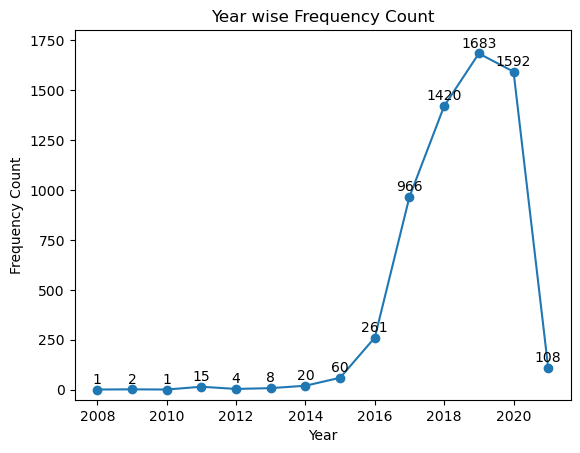

In [27]:
# Line chart for year on year change in the frequency of movie releases
year_count=netflix_df.pivot_table(index=netflix_df["Release_Date"].dt.year,values="Show_Id",aggfunc="count")
year_count.rename(columns={"Show_Id":"Count"},inplace=True)
plt.plot(year_count.index,year_count.loc[:,"Count"],marker="o")
for x,y in zip(year_count.index,year_count.loc[:,"Count"]):
    plt.text(x,y+30,str(y),ha="center")
plt.ylim(-50,1800)
plt.xlabel("Year")
plt.ylabel("Frequency Count")
plt.title("Year wise Frequency Count")
